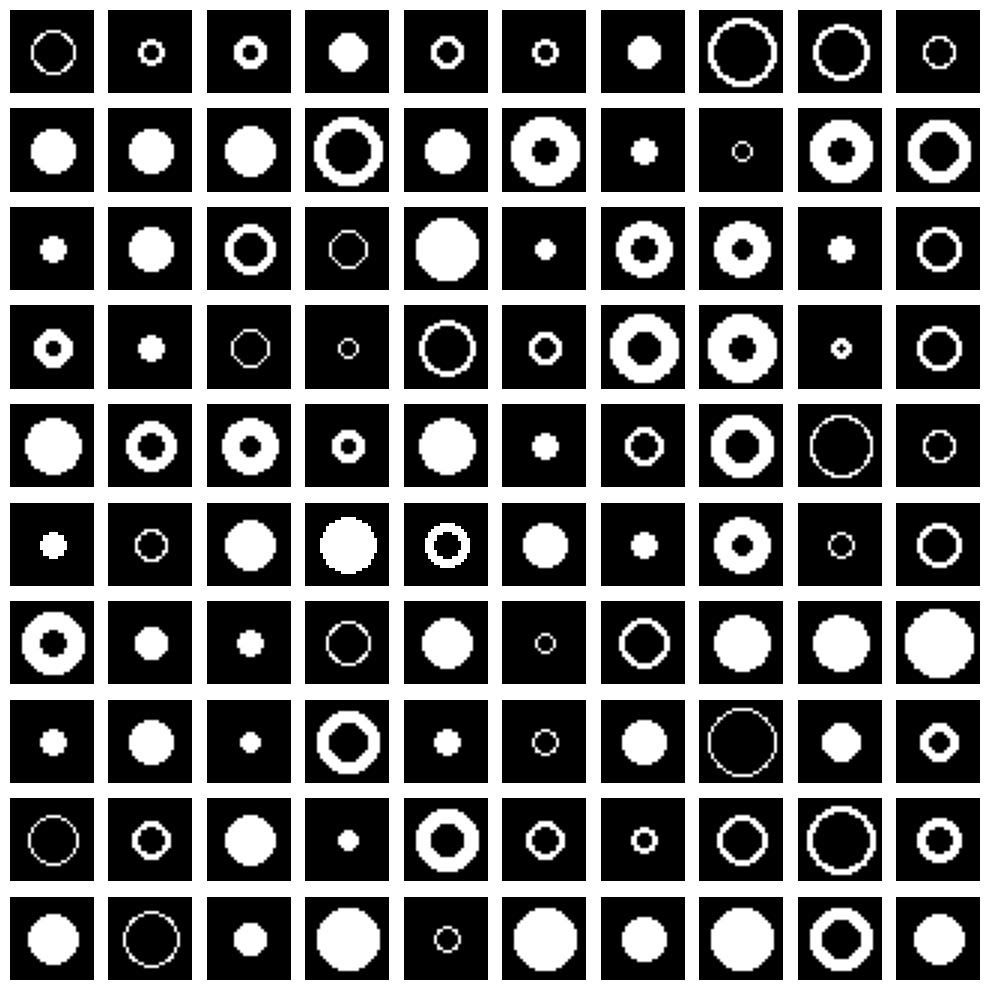

In [3]:
from PIL import Image, ImageDraw
import numpy as np
import random

# Function to create a disk or circle image
def create_shape_image(image_size, shape, diameter, thickness):
    image = Image.new('L', (image_size, image_size), 0)  # Create a black image
    draw = ImageDraw.Draw(image)
    center = image_size // 2
    radius = diameter // 2
    
    if shape == 'disk':
        # Draw a filled circle (disk)
        draw.ellipse((center - radius, center - radius, center + radius, center + radius), fill='white')
    elif shape == 'circle':
        # Draw a circle with given thickness
        # for t in range(thickness):
        #     draw.ellipse((center - radius + t, center - radius + t, center + radius - t, center + radius - t), outline=255)
        for t, fill in ( 0, 'white' ), ( thickness, 'black' ):
            draw.ellipse((center - radius + t, center - radius + t, center + radius - t, center + radius - t), fill=fill)
    
    return np.array(image)

# Parameters
image_size = 28
num_images = 100  # Number of images to generate

# Generate dataset
dataset = []

for _ in range(num_images):
    shape = random.choice(['disk', 'circle'])
    diameter = random.randint(image_size // 4, image_size // 1.2)  # Diameter between 2 and 10
    thickness = random.randint(1, diameter // 3) if shape == 'circle' else None  # Thickness for circle
    
    image = create_shape_image(image_size, shape, diameter, thickness)
    dataset.append(image)

# Convert dataset to numpy array
dataset = np.array(dataset)

# Display the dataset
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(dataset[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [4]:
dataset.shape, dataset.min(), dataset.max()

((100, 28, 28), 0, 255)